# Preprocessing Data

## Import Data & Convert CSV to Parquet

In [2]:
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [28]:
# Memuat data csv
df_jam = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam.csv', encoding='utf-8')  # atau encoding='latin1' ika ada error karakter
df_hari = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_harian.csv', encoding='utf-8')  # atau encoding='latin1' ika ada error karakter
df_suhu = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_suhu.csv', encoding='utf-8')  # atau encoding='latin1' ika ada error karakter

In [ ]:
# Tampilkan 5 baris pertama untuk memastikan data terbaca
df_jam.head()

,id,timestamp,fakultas,gedung,meter_id,power,tegangan,fasa1,fasa2,fasa3,A,A1,A2,A3,PF,F,quality
0,1870125,2025-05-22 18:00:00,UNIT KERJA,Villa Merah,500002,2.573380,226.577,1.029990,1.074740,0.468644,3.568700,4.625960,3.841070,2.239070,1.002650,50.0516,1
1,1870124,2025-05-22 18:00:00,PLTS,Villa Merah,500001,0.039048,226.489,0.021271,0.000565,0.017212,0.110124,0.073325,0.064764,0.192282,0.073612,50.0511,1
2,1870123,2025-05-22 18:00:00,-,Jatinangor - Gedung Kuliah E,244002,0.047387,228.648,0.015411,0.017277,0.014700,0.268609,0.302831,0.262984,0.240011,0.257297,50.0563,1
3,1870122,2025-05-22 18:00:00,-,Jatinangor - Gedung Kuliah E,244001,1.118340,227.439,0.042177,0.146293,0.929866,1.465150,0.374525,0.344740,3.676200,1.272890,50.0560,1
4,1870121,2025-05-22 18:00:00,-,Jatinangor - Gedung Kuliah D,243002,0.768578,227.322,0.074712,0.392907,0.300959,1.326280,0.379548,2.518300,1.080980,0.729951,50.0566,1


In [6]:
# Tampilkan 5 baris pertama untuk memastikan data terbaca
df_hari.head()

,id,timestamp,fakultas,gedung,meter_id,power,tegangan,fasa1,fasa2,fasa3,PF,F,totwbpday,totkwhday
0,98485,2025-05-08 00:00:00,FTI,LABTEK VI,1,59.0757,224.550,16.0508,26.4118,16.6130,0.898712,50.0132,0.0,59.0757
1,98486,2025-05-08 00:00:00,FTI,LABTEK VI,2,249.5590,224.387,106.6670,80.1215,62.7700,0.958029,50.0131,0.0,249.5590
2,98487,2025-05-08 00:00:00,FTI,LABTEK VI,3,138.7480,224.492,40.7131,41.5531,56.4816,0.933714,50.0128,0.0,138.7480
3,98488,2025-05-08 00:00:00,FTI,LABTEK VI,4,202.7410,224.426,74.5905,70.1883,57.9625,0.975660,50.0129,0.0,202.7410
4,98489,2025-05-08 00:00:00,FTI,LABTEK VI,5,969.7670,224.618,301.3930,352.5320,315.8410,0.974203,50.0126,0.0,969.7670


In [5]:
# Tampilkan 5 baris pertama untuk memastikan data terbaca
df_suhu.head()

,stationDateTime,outsideTemp
0,2022-07-04 11:37:07,28.7
1,2022-07-04 11:37:07,28.7
2,2022-07-04 11:37:07,28.7
3,2022-07-04 11:40:10,28.8
4,2022-07-04 11:41:10,28.8


In [7]:
# # Convert data_jam dari .csv ke .parquet
df_jam.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet', engine='pyarrow')

# # Convert data_harian dari .csv ke .parquet
df_hari.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet', engine='pyarrow')

# # Convert data_suhu dari .csv ke .parquet
df_suhu.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_suhu.parquet', engine='pyarrow')

## Merapikan Data

### Menghapus Kolom yang tidak digunakan (data_1)

In [ ]:
# Membuat variabel baru untuk proses selanjutnya (cleaning)
df_jam_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam.parquet')
df_hari_1 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari.parquet')


In [10]:
# # Menghapus kolom yang tidak digunakan pada dara konsumsi listrik
hapus_kolom_jam = ['id','tegangan', 'fasa1', 'fasa2', 'fasa3', 'A', 'A1', 'A2', 'A3', 'PF', 'F', 'quality']
hapus_kolom_hari = ['id','tegangan','fasa1','fasa2','fasa3','PF','F','totwbpday','totkwhday']

# # Menghapus kolom dari DataFrame
df_jam_1 = df_jam_1.drop(columns=hapus_kolom_jam)
df_hari_1 = df_hari_1.drop(columns=hapus_kolom_hari)

In [11]:
#pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet')
df_jam_1.tail()

,timestamp,fakultas,gedung,meter_id,power
1869752,2022-06-25 19:00:00,FTI,Labtek VI,6,0.389630
1869753,2022-06-25 18:00:00,FTI,Labtek VI,6,0.392158
1869754,2022-06-25 17:00:00,FTI,Labtek VI,6,0.388947
1869755,2022-06-25 16:00:00,FTI,Labtek VI,6,0.406437
1869756,2022-06-25 15:00:00,FTI,Labtek VI,6,0.413751


In [12]:
df_hari_1.tail()

,timestamp,fakultas,gedung,meter_id,power
78483,2022-06-25 00:00:00,FTI,Labtek VI,4,10.42030
78484,2022-06-25 00:00:00,FTI,Labtek VI,3,12.04120
78485,2022-06-25 00:00:00,FTI,Labtek VI,2,5.47485
78486,2022-06-25 00:00:00,FTI,Labtek VI,1,21.30920
78487,2022-06-25 00:00:00,FTI,Labtek VI,5,85.35800


In [13]:
# Save file parquet ke versi 1.
df_jam_1.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet', engine='pyarrow')
df_hari_1.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet', engine='pyarrow')

# Versi 1 = sudah dihilangkan kolom yang tidak digunakan

### Menghapus meter_id yang tidak digunakan (data_2)

In [14]:
# 1. Membaca file Parquet
df_hari_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_1.parquet')
df_jam_2 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_1.parquet')

# 2. Daftar meter_id yang ingin dihapus
meter_ids_to_remove = [    
    # Jatinangor
        241001,242001,243001,243002,244002,244001,235001,236001,237001,238001,239001,240001,
    # BSC-B selain total
        114002,114003,114004,114005,
    # Labtek V SDP (selain MDP)
        105105,105104,105103,105102,105101,
    # Labtek VI selain total
        2,3,1,4,6,
    # Labtek VII selain total
        107104,107103,107102,107101,
    # Labtek VIII selain total
        108112,108111,108113,108114,108110,
]

# 3. Menghapus baris yang memiliki meter_id tersebut
df_hari_2 = df_hari_2[~df_hari_2['meter_id'].isin(meter_ids_to_remove)]
df_jam_2 = df_jam_2[~df_jam_2['meter_id'].isin(meter_ids_to_remove)]

# 4. (Opsional) Menyimpan hasilnya ke file baru
df_hari_2.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
df_jam_2.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')


In [ ]:
# Menghitung jumlah nilai kosong (NaN) di kolom 'power'
jumlah_kosong_hari = df_hari_2['power'].isna().sum()
jumlah_kosong_jam = df_jam_2['power'].isna().sum()

print(f"Jumlah data kosong di kolom 'power' hari: {jumlah_kosong_hari}")
print(f"Jumlah data kosong di kolom 'power' jam: {jumlah_kosong_jam}")

# power yang kosong otomatis tidak ada karena tidak ter-record


Jumlah data kosong di kolom 'power' hari: 0
Jumlah data kosong di kolom 'power' jam: 0


### Membuat pivot table (data_3)

In [18]:
# Pivot table data_hari
data_jam_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_2.parquet')
data_jam_to_pivot['timestamp'] = pd.to_datetime(data_jam_to_pivot['timestamp'])
data_jam_3 = data_jam_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')
data_jam_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')

In [20]:
# Pivot table data_jam
data_jam_to_pivot = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_2.parquet')
data_jam_to_pivot['timestamp'] = pd.to_datetime(data_jam_to_pivot['timestamp'])
data_jam_3 = data_jam_to_pivot.pivot_table(index='timestamp', columns='meter_id', values='power', aggfunc='sum')
data_jam_3.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')

In [ ]:
## Cadangkan ke file .csv

# jam_to_csv = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
# jam_to_csv.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_jam_3.csv')

# hari_to_csv = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')
# hari_to_csv.to_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\data_hari_3.csv')

### Membuat tabel dan visualisasi missing data dari meter_id

In [22]:
meter_id = pd.read_csv(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\csv\meter_id.csv')
meter_id.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet')

In [23]:
# Load the pivot table data
pivot_data = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')

# Load the meter_id data
meter_id_data = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet')

# Analyze missing data in pivot table
missing_data_analysis = pivot_data.isna().sum().reset_index()
missing_data_analysis.columns = ['meter_id', 'missing_count']

# Convert 'meter_id' columns to string type
missing_data_analysis['meter_id'] = missing_data_analysis['meter_id'].astype(str)
meter_id_data['meter_id'] = meter_id_data['meter_id'].astype(str)

# Merge with meter_id data to get additional information
missing_data_analysis = missing_data_analysis.merge(meter_id_data, on='meter_id', how='left')

# Save the analysis result to a new CSV file
missing_data_analysis.to_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\missing_data1.parquet', index=False)

# Display the analysis result
missing_data_analysis.head()


,meter_id,missing_count,fakultas,gedung,lokasi,ip,modbus_slave,include,power_meter
0,5,28,FTI,LABTEK VI,Total,192.168.1.111,5.0,1.0,1200.0
1,103,967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,163,24,SBM,SBM,SBM MDP Total,None,0.0,1.0,0.0
3,2026,1059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101010,525,FMIPA,LABTEK I,Server DTI,10.1.100.10,10.0,1.0,2200.0


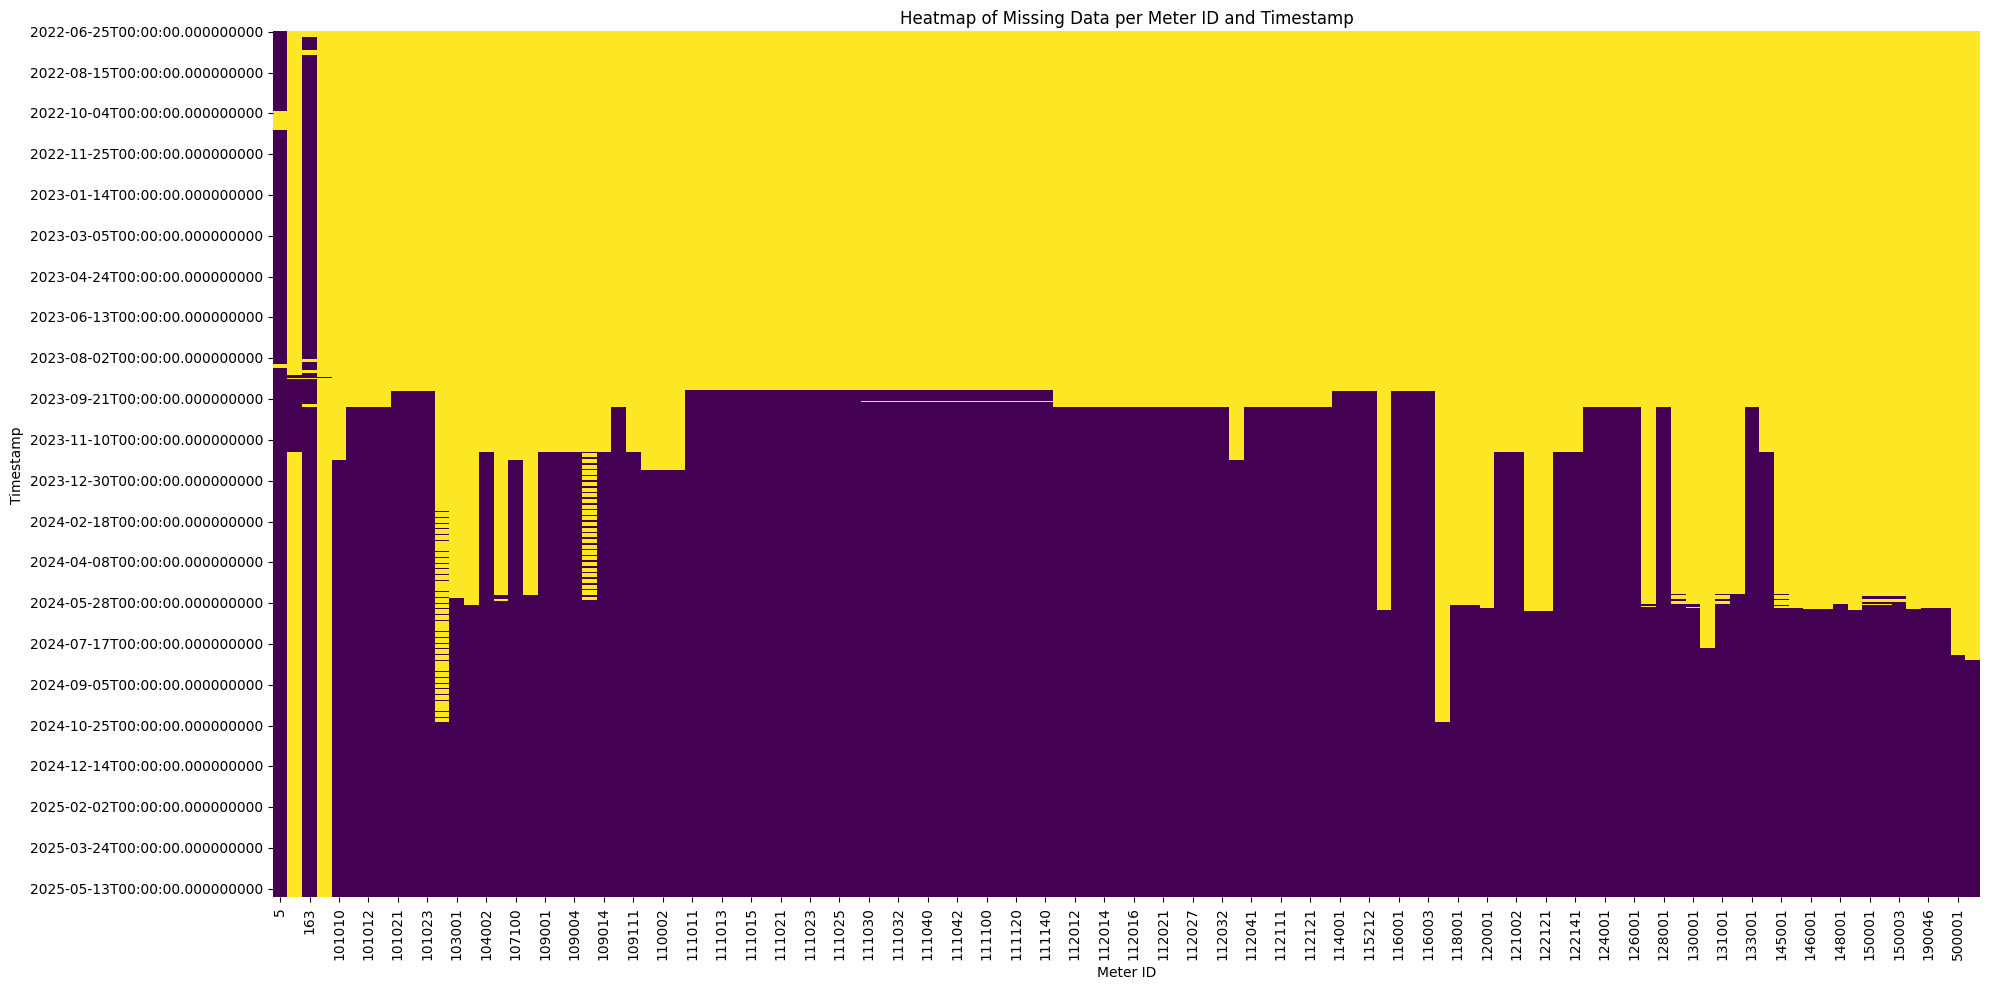

In [25]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Load the data
pivot_data = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')

# Buat DataFrame boolean untuk missing data
missing_data = pivot_data.isna()

# Pastikan index dalam format datetime
missing_data.index = pd.to_datetime(missing_data.index)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=50)
plt.title('Heatmap of Missing Data per Meter ID and Timestamp')
plt.xlabel('Meter ID')
plt.ylabel('Timestamp')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


) missing from font(s) Arial.ocal\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) Arial.ocal\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


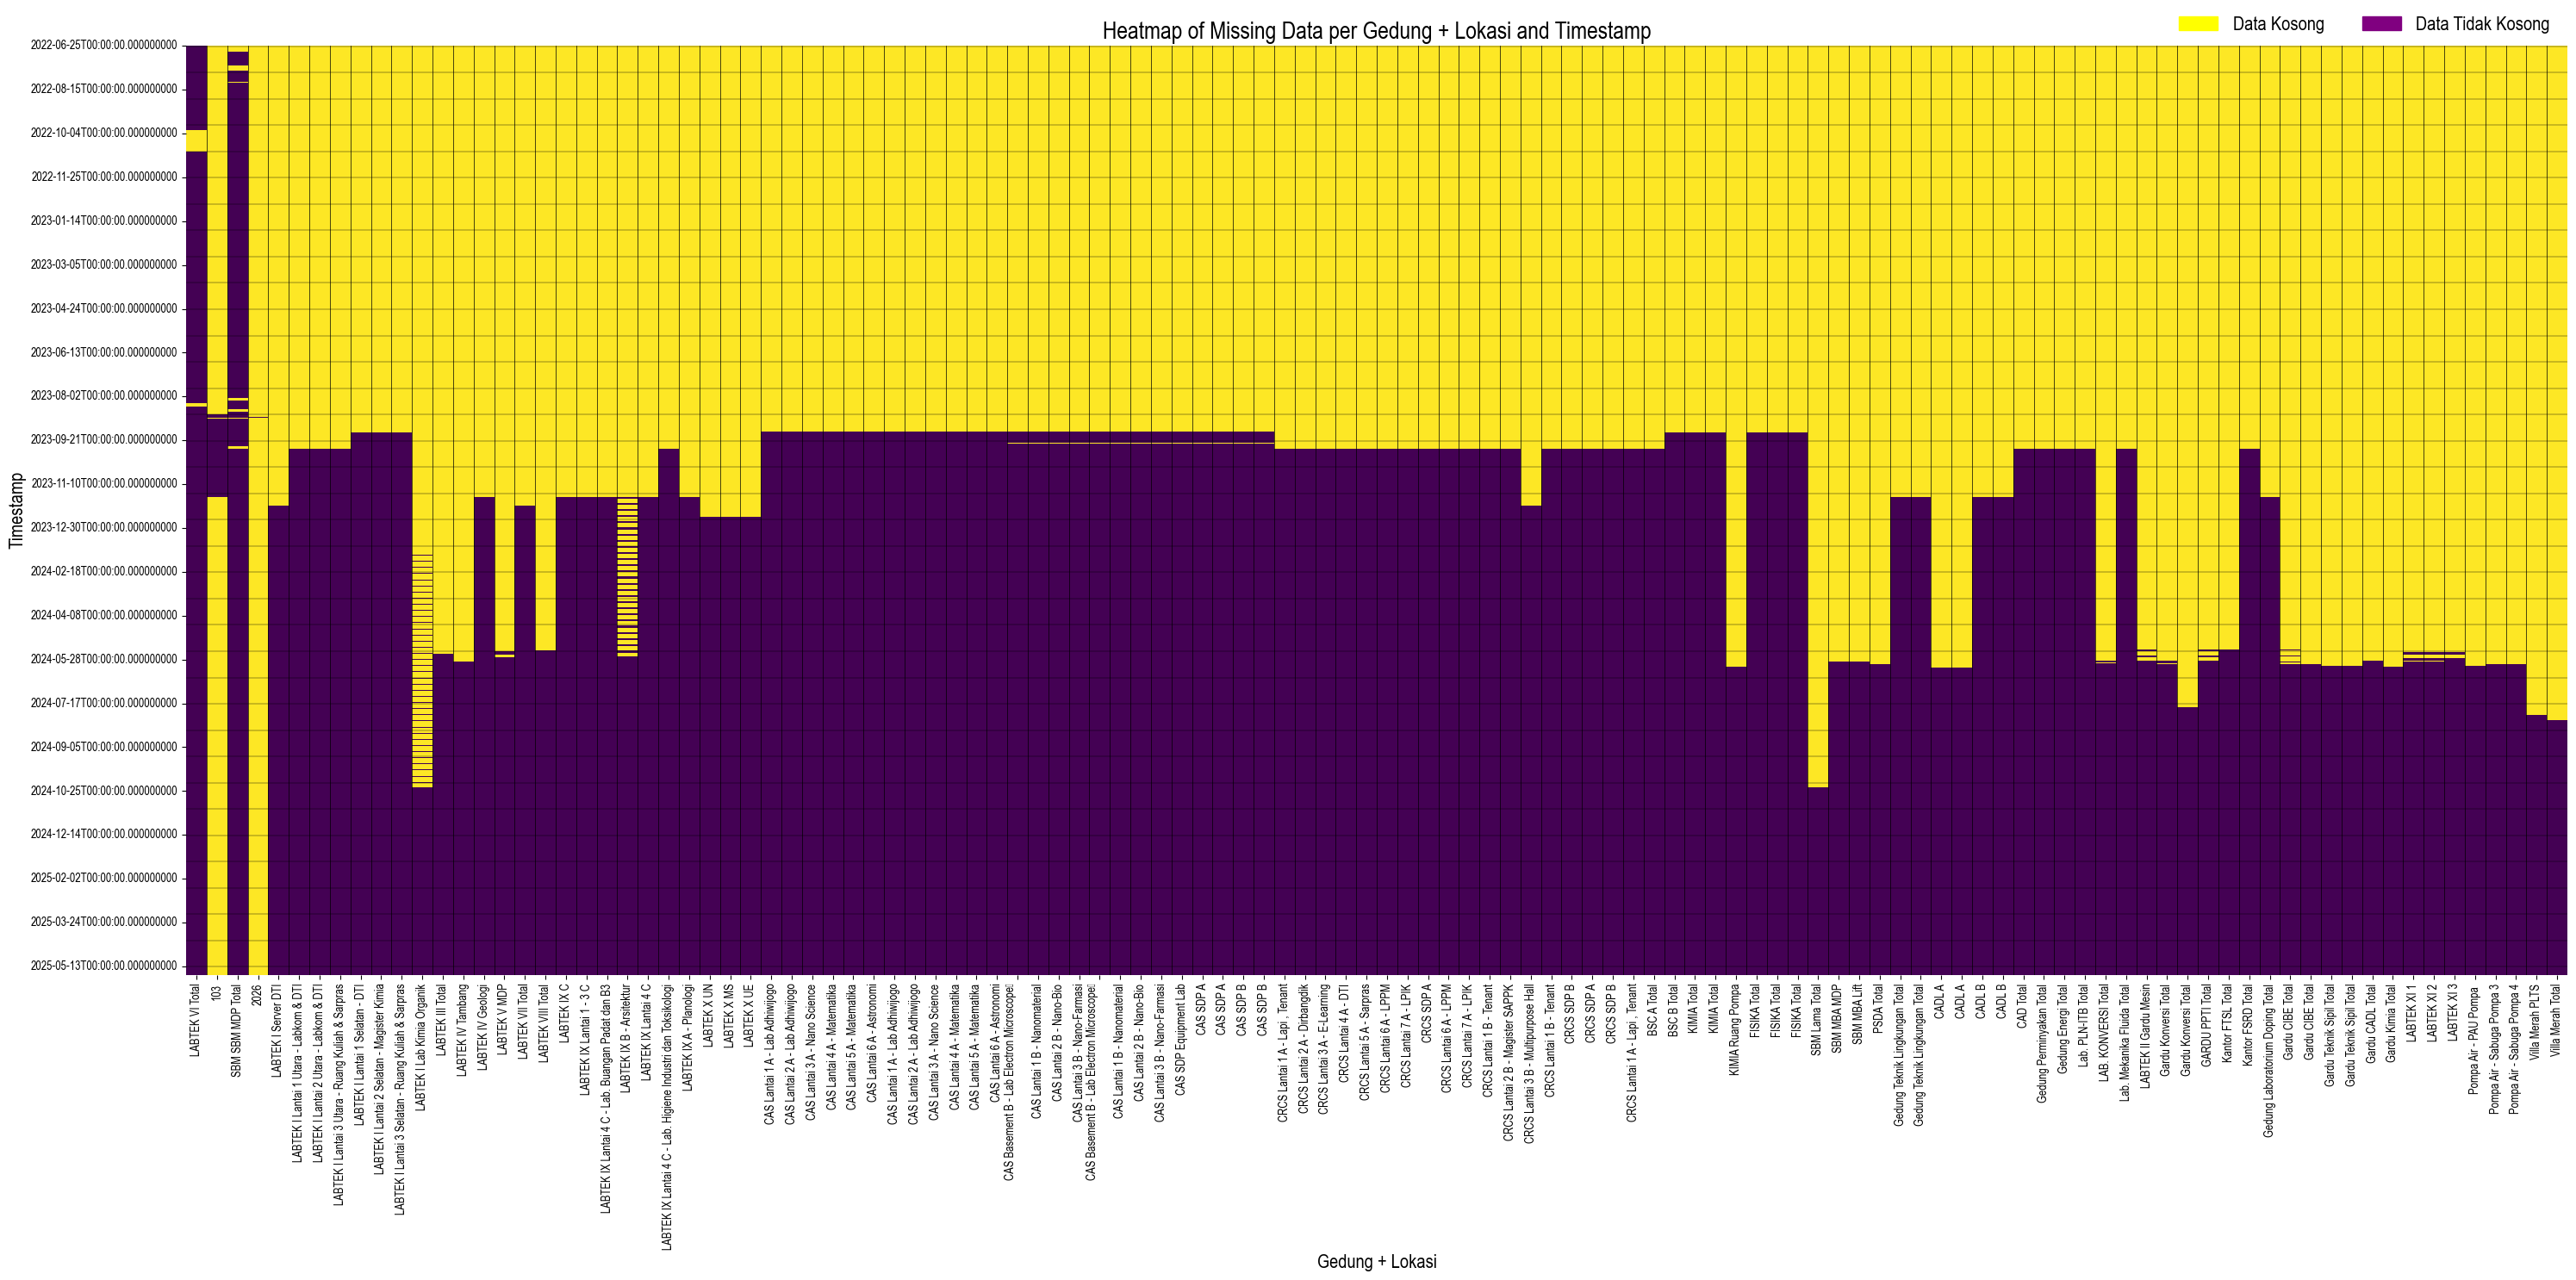

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load the data
pivot_data = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')
metadata = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet')

# Create a dictionary for mapping meter_id to gedung + lokasi
meter_id_mapping = {row['meter_id']: f"{row['gedung']} {row['lokasi']}" for _, row in metadata.iterrows()}

# Rename columns in pivot_data using the mapping
pivot_data.rename(columns=meter_id_mapping, inplace=True)


# Create a boolean DataFrame where True indicates missing data (NaN)
missing_data = pivot_data.isna()

# Ensure the index is in datetime format
missing_data.index = pd.to_datetime(missing_data.index)

# Plot the heatmap
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(30, 15))
ax = sns.heatmap(missing_data, cbar=False, cmap='viridis', yticklabels=50)

# Tambahkan garis vertikal dan horizontal
for i in range(1, missing_data.shape[1]):
    plt.axvline(x=i, color='black', linewidth=0.5)
for j in range(1, missing_data.shape[0], 30): #30 menandakan jarak tanggalnya
    plt.axhline(y=j, color='black', linewidth=0.3)

# Tambahkan legend custom
yellow_patch = mpatches.Patch(color='yellow', label='Data Kosong')
purple_patch = mpatches.Patch(color='purple', label='Data Tidak Kosong')
plt.legend(
    handles=[yellow_patch, purple_patch],
    # loc='lower center',
    bbox_to_anchor=(1, 1.05),
    ncol=2,
    fontsize=16,
    frameon=False
)

plt.title('Heatmap of Missing Data per Gedung + Lokasi and Timestamp', fontsize = 20)
plt.xlabel('Gedung + Lokasi', fontsize = 16)
plt.ylabel('Timestamp', fontsize = 16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

) missing from font(s) Arial.ocal\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 13 (
  fig.canvas.draw()
) missing from font(s) Arial.ocal\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


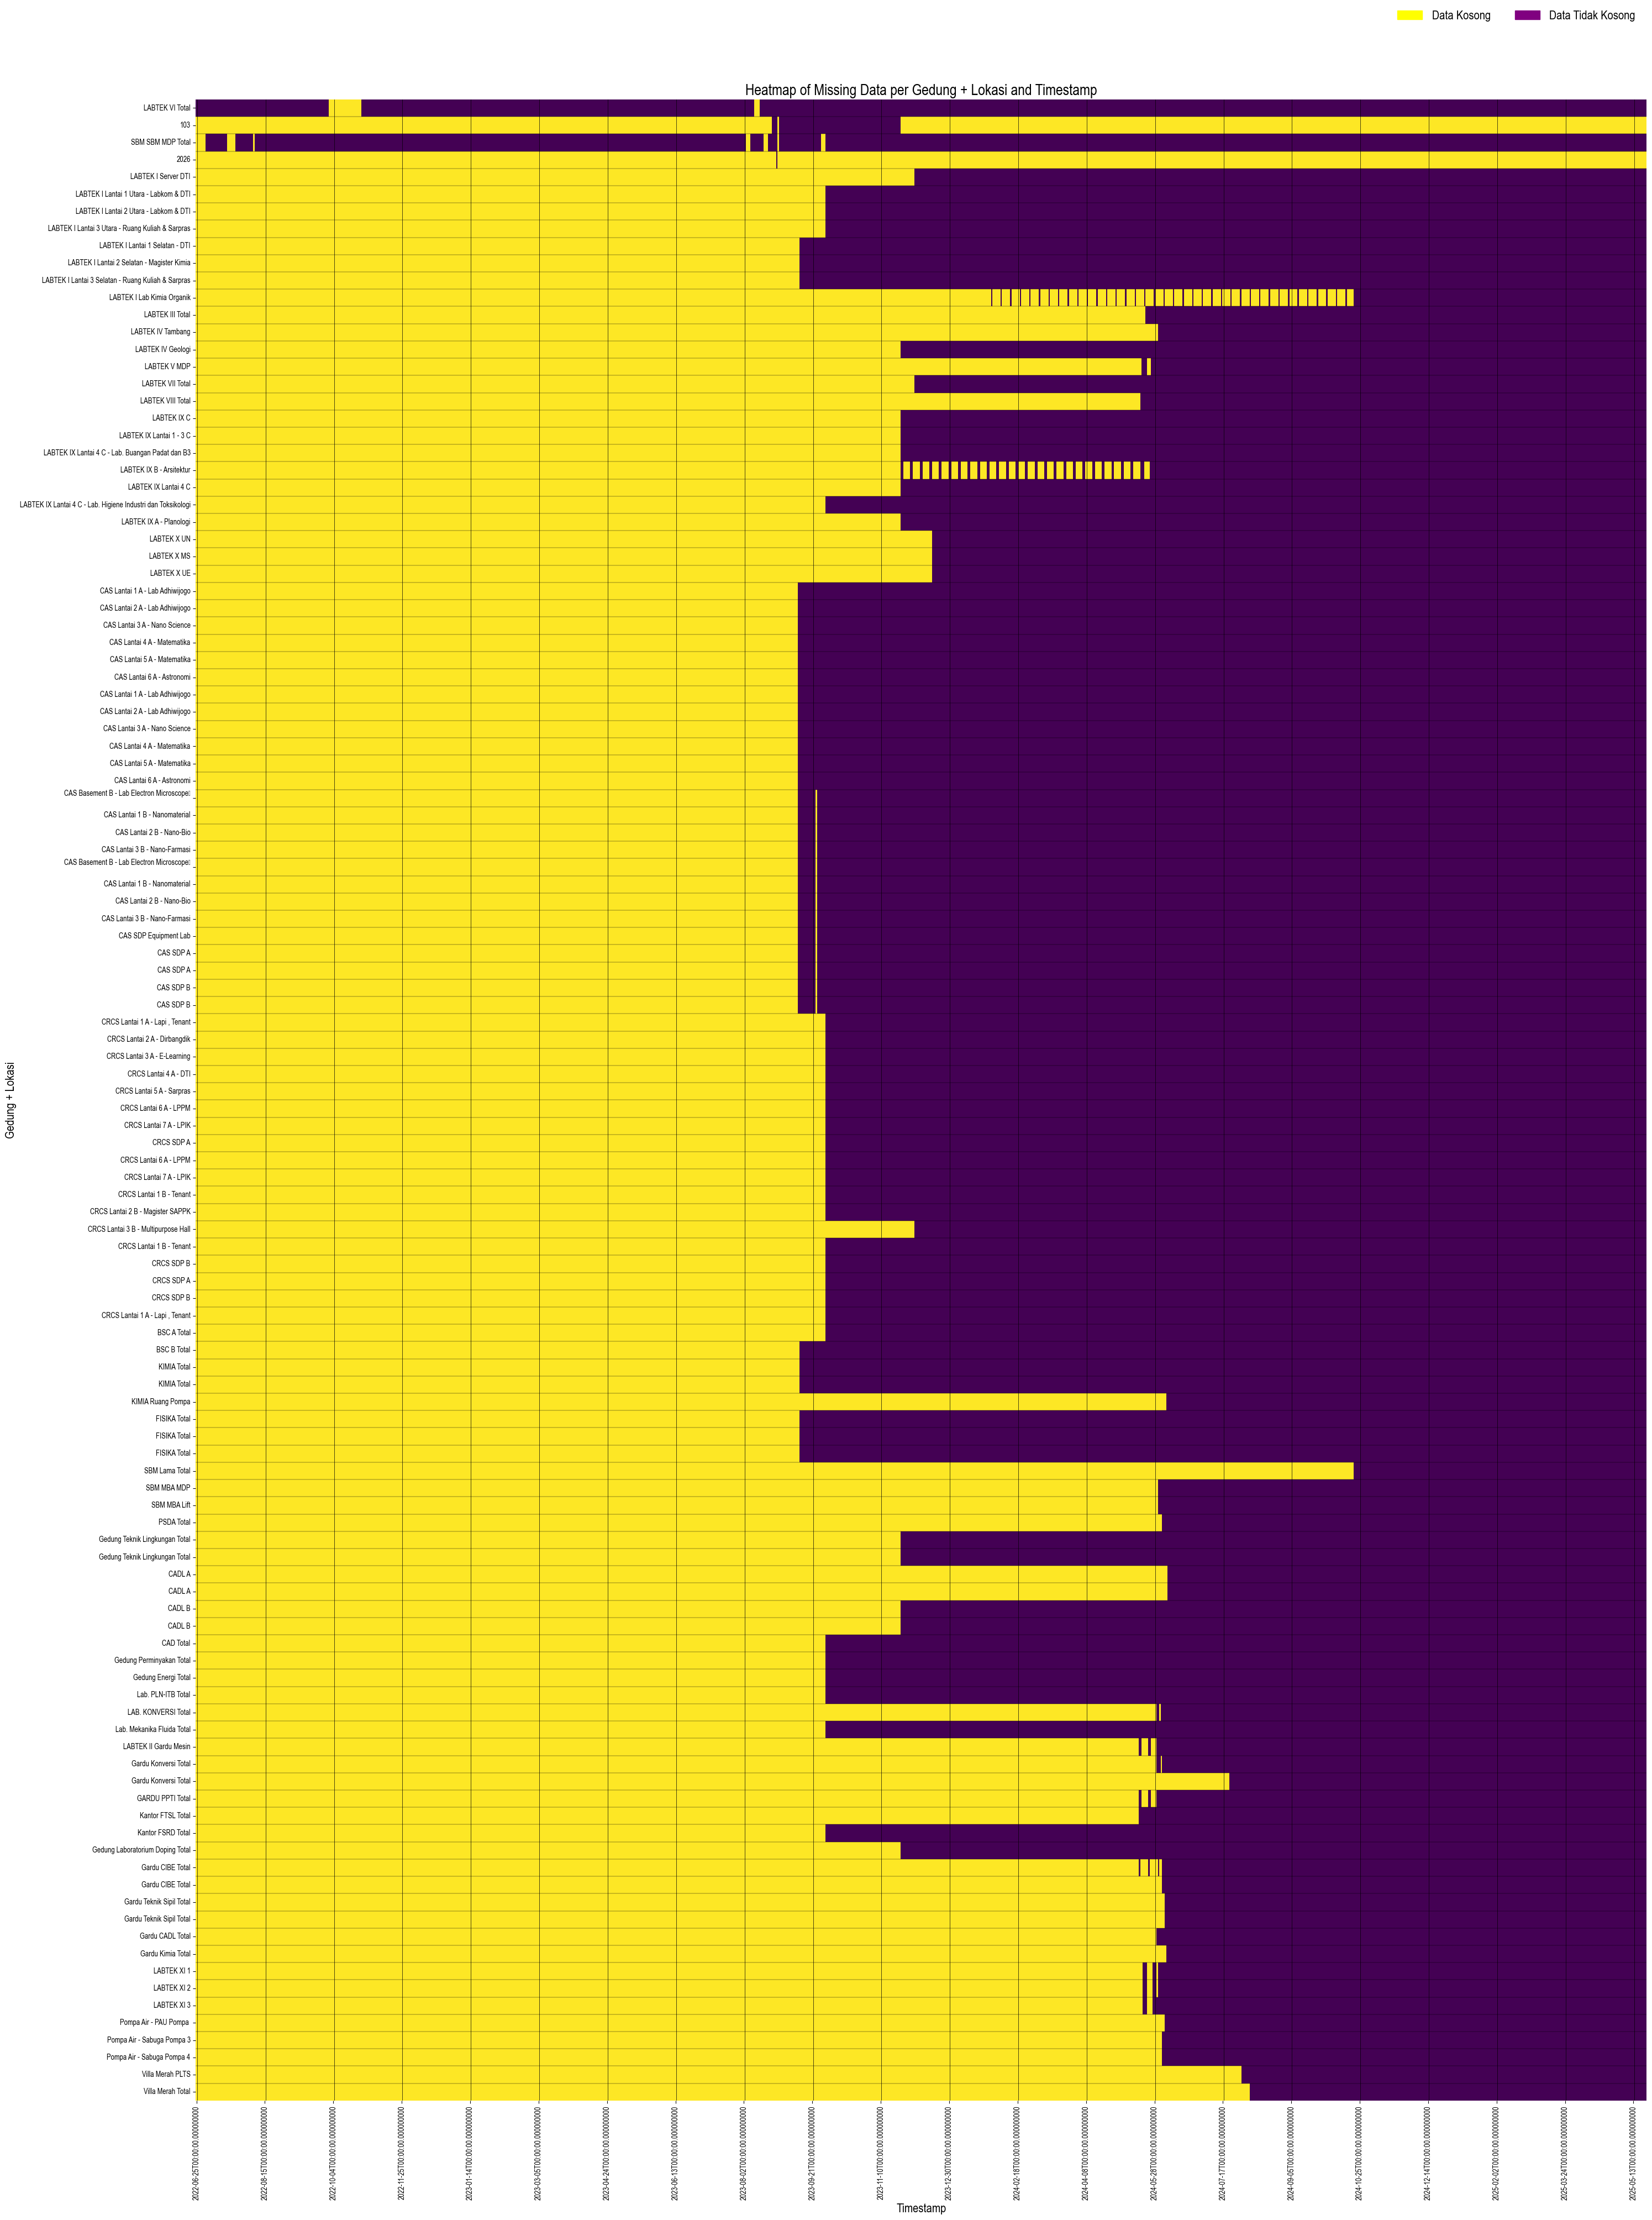

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load the data
pivot_data = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')
metadata = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\meter_id.parquet')

# Create a dictionary for mapping meter_id to gedung + lokasi
meter_id_mapping = {row['meter_id']: f"{row['gedung']} {row['lokasi']}" for _, row in metadata.iterrows()}

# Rename columns in pivot_data using the mapping
pivot_data.rename(columns=meter_id_mapping, inplace=True)

# Set the timestamp column as the index
# pivot_data.set_index('timestamp', inplace=True)

# Create a boolean DataFrame where True indicates missing data (NaN)
missing_data = pivot_data.isna()

# Ensure the index is in datetime format
missing_data.index = pd.to_datetime(missing_data.index)

# Transpose the missing_data DataFrame
missing_data_transposed = missing_data.T

# Plot the heatmap
plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=(30, 40))
ax = sns.heatmap(missing_data_transposed, cbar=False, cmap='viridis', xticklabels=50)

# Tambahkan garis vertikal dan horizontal
for i in range(1, missing_data_transposed.shape[1], 50):
    plt.axvline(x=i, color='black', linewidth=0.5)
for j in range(1, missing_data_transposed.shape[0]):
    plt.axhline(y=j, color='black', linewidth=0.3)

# Tambahkan legend custom
yellow_patch = mpatches.Patch(color='yellow', label='Data Kosong')
purple_patch = mpatches.Patch(color='purple', label='Data Tidak Kosong')
plt.legend(
    handles=[yellow_patch, purple_patch],
    bbox_to_anchor=(1, 1.05),
    ncol=2,
    fontsize=16,
    frameon=False
)

plt.title('Heatmap of Missing Data per Gedung + Lokasi and Timestamp', fontsize=20)
plt.xlabel('Timestamp', fontsize=16)
plt.ylabel('Gedung + Lokasi', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Filter Timestamp

In [29]:
# Membuat variabel baru untuk proses selanjutnya (cleaning)
df_jam_4 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_jam_3.parquet')
df_hari_4 = pd.read_parquet(r'C:\MyFolder\Git\TA_SpatioTemporal\Data\parquet\data_hari_3.parquet')

In [ ]:
# menghilangkan data sebelum bulan Juni 2024

,stationDateTime,outsideTemp
0,2022-07-04 11:37:07,28.7
1,2022-07-04 11:37:07,28.7
2,2022-07-04 11:37:07,28.7
3,2022-07-04 11:40:10,28.8
4,2022-07-04 11:41:10,28.8
...,...,...
1436492,2025-05-22 18:25:10,22.1
1436493,2025-05-22 18:26:10,22.1
1436494,2025-05-22 18:27:10,22.0
1436495,2025-05-22 18:28:10,22.0


1. potong data setahun terakhir saja
2. isi data yang kosong dengan metode yang ada (fill-forward, interpolasi, atau lainnya)
3. masukkan longitude dan latitude. gak tau gimana susunannya
4. data cuaca--> olah jadi data perjam. gabung dengan data konsumsi energi. (gatau gimana cara gabungnya)
5. coba geopandas atau apapun untuk bisa visualisasi.

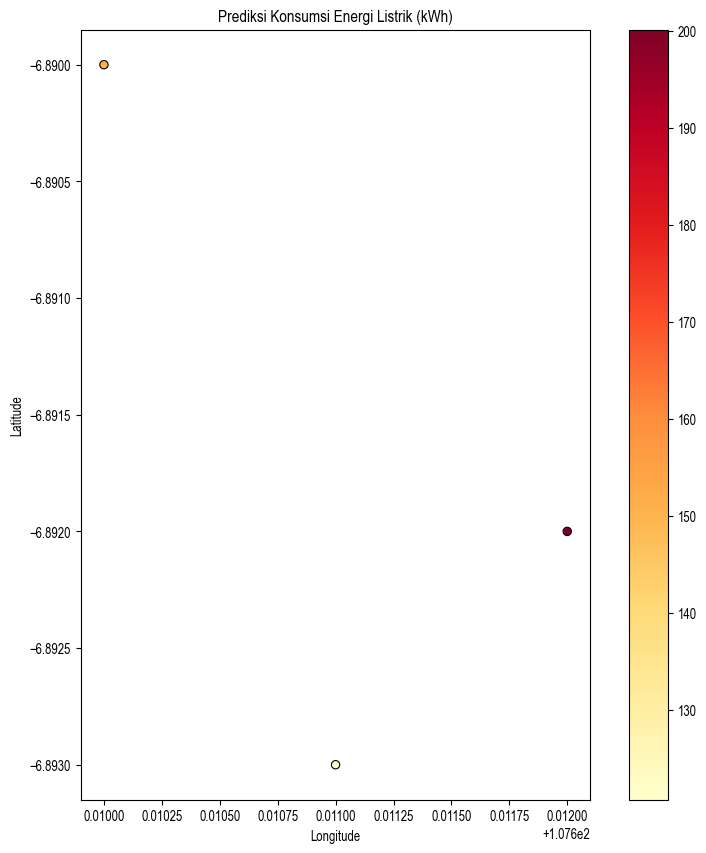

In [32]:
import geopandas
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Contoh data prediksi (sesuaikan dengan output model Anda)
# df_predictions akan memiliki kolom 'timestamp', 'gedung', 'predicted_power'
df_predictions_example = pd.DataFrame({
    'gedung': ['Gedung A', 'Gedung B', 'Gedung C'],
    'latitude': [-6.8900, -6.8920, -6.8930], # Contoh lintang
    'longitude': [107.6100, 107.6120, 107.6110], # Contoh bujur
    'predicted_power': [150.5, 200.1, 120.7] # Contoh nilai prediksi
})

# Konversi DataFrame ke GeoDataFrame
geometry = [Point(xy) for xy in zip(df_predictions_example['longitude'], df_predictions_example['latitude'])]
gdf = geopandas.GeoDataFrame(df_predictions_example, geometry=geometry, crs="EPSG:4326") # EPSG:4326 untuk WGS84 (lat/lon)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='predicted_power', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_title('Prediksi Konsumsi Energi Listrik (kWh)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Untuk interaktif dengan Folium (perlu instalasi folium)
import folium
m = folium.Map(location=[-6.891, 107.610], zoom_start=15)
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=row['predicted_power'] / 50, # Ukuran marker berdasarkan power
        color='blue',
        fill=True,
        fill_color='blue',
        tooltip=f"{row['gedung']}: {row['predicted_power']:.2f} kWh"
    ).add_to(m)
m.save("predicted_energy_map.html")